# Table of Contents
 <p><div class="lev1 toc-item"><a href="#City-Growth" data-toc-modified-id="City-Growth-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>City Growth</a></div><div class="lev1 toc-item"><a href="#Plotting-NYC-parks" data-toc-modified-id="Plotting-NYC-parks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting NYC parks</a></div><div class="lev1 toc-item"><a href="#NYC-street-network" data-toc-modified-id="NYC-street-network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>NYC street network</a></div><div class="lev1 toc-item"><a href="#Noise-complaints" data-toc-modified-id="Noise-complaints-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Noise complaints</a></div>

__author__ = "federicaBBianco NYU 2017"

code generated for the introductory blog post for WIMLDS Smart Cities hackathon March 25 2017

In [71]:
import os
import pylab as pl
import numpy as np
import pandas as pd
import geopandas as gpd #geospatioal dataframe based library
#for parks and noise
import choroplethNYC as cp # my repo to plot NYC choropleths https://github.com/fedhere/choroplethNYC

#for streets
import osmnx as ox # a pretty cool package to map streets and design routes https://github.com/gboeing/osmnx

# for noise
from fiona.crs import from_epsg
import shapely
import smoomapy #for smoothing
import jenkspy #for smoothing


%pylab inline
pl.rcParams["figure.figsize"] =  (20,10)
pl.rcParams["font.size"] = 30

Populating the interactive namespace from numpy and matplotlib


# City Growth

sources :

NYC https://en.wikipedia.org/wiki/New_York_City

Paris https://en.wikipedia.org/wiki/Demographics_of_Paris

Shanghai https://en.wikipedia.org/wiki/Shanghai

Tokyo http://worldpopulationreview.com/world-cities/tokyo-population/ and https://en.wikipedia.org/wiki/Tokyo#/media/File:Tokyo_historical_population.gif

In [3]:
#NYC
popNYC = pd.read_csv("NYCpop.csv")
popNYC['pop'] = popNYC['pop'] * 1e-6
todayNYC = popNYC['pop'].values[-1]
popNYC['pop'] = popNYC['pop'] / todayNYC

#Paris 
popPa = pd.read_csv("Parispop.csv")
popPa['pop'] = popPa['pop'] * 1e-6
todayPa = popPa['pop'].values[-1]
popPa['pop'] = popPa['pop'] / todayPa


#Shanghai 
popSh = pd.read_csv("Shanghaipop.csv")
popSh['pop'] = popSh['pop'] * 1e-6
todaySh = popSh['pop'].values[-1]
popSh['pop'] = popSh['pop'] / todaySh


#Tokyo
popTo = pd.read_csv("Tokyo.csv").sort("year")
popTo['pop'] = popTo['pop']  
todayTo = popTo['pop'].values[-1]
popTo['pop'] = popTo['pop'] / todayTo


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


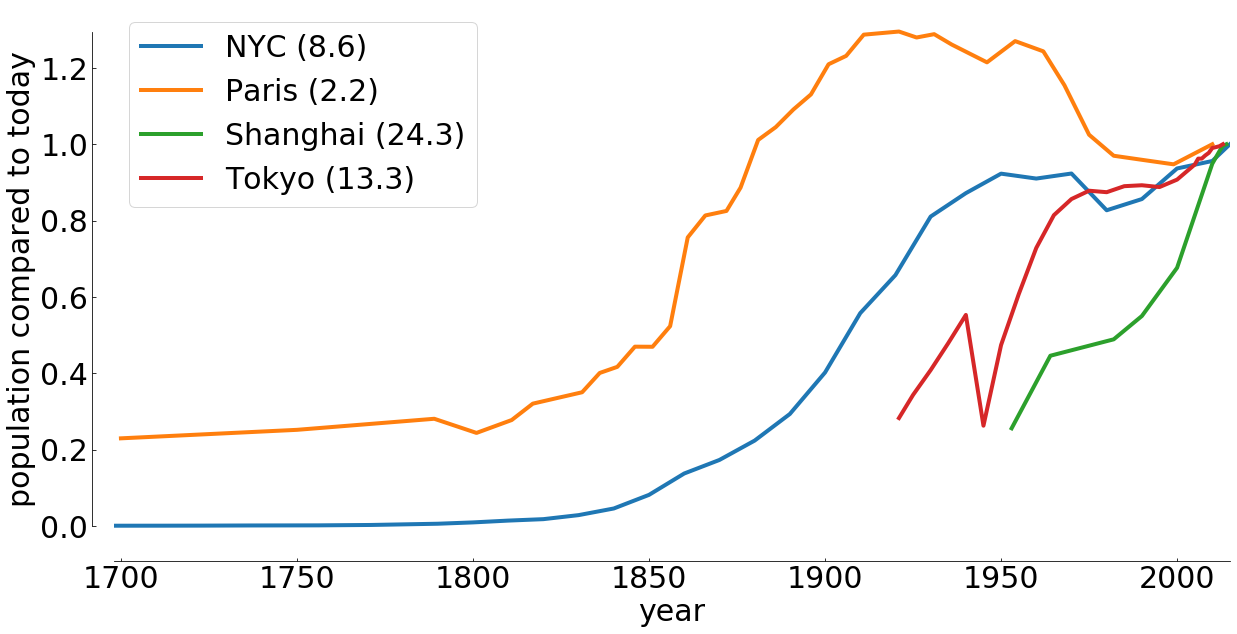

In [4]:
ax = popNYC[['year','pop']].plot(x='year',y='pop', lw=4, label="NYC (%.1f)"%todayNYC)
popPa[['year','pop']].plot(x='year',y='pop', lw=4, label="Paris (%.1f)"%todayPa, ax=ax)
popSh[['year','pop']].plot(x='year',y='pop', lw=4, label="Shanghai (%.1f)"%todaySh, ax=ax)
popTo[['year','pop']].plot(x='year',y='pop', lw=4, label="Tokyo (%.1f)"%todayTo, ax=ax)

ax.set_ylabel("population compared to today")
ax.spines['left'].set_position(('axes', -0.02))
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('axes', -0.02))
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Plotting NYC parks

data: Greenstreets.zip Parks Properties.geojson from nyc data portal http://opendata.cityofnewyork.us/

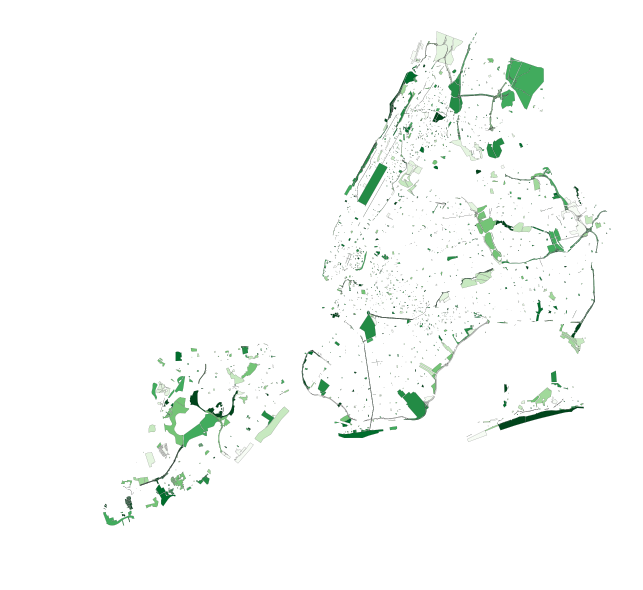

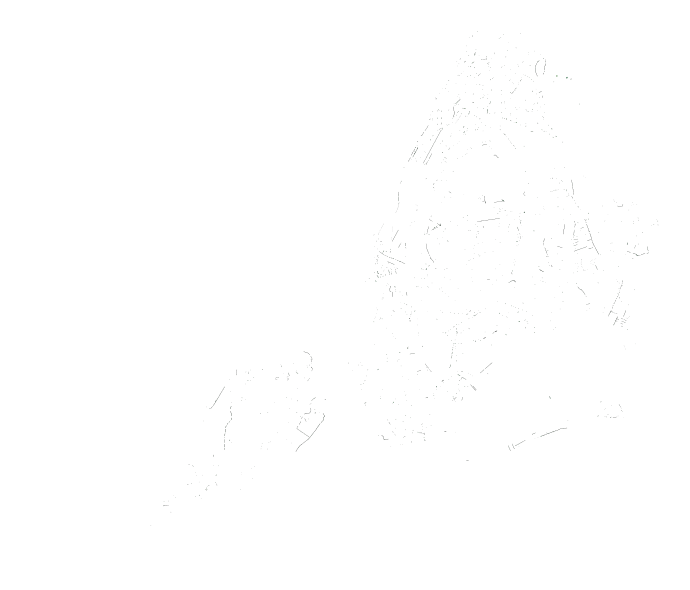

In [19]:
figpark = pl.figure(figsize=(20,20))
ax = figpark.add_subplot()
parks = gpd.GeoDataFrame.from_file("Parks Properties.geojson")
gs = gpd.GeoDataFrame.from_file("Greenstreets_20120627.shp")
cp.choroplethNYC(parks, cmap='Greens', ax=ax, cb=False, lw=0.1)
cp.choroplethNYC(gs, cmap='Greens', cb=False, lw=0.1, ax=ax)
pl.savefig("parks.png", dpi = 100)

# NYC street network

data: automatically queried from OpenStreetMap by OSMnx

In [10]:
NYCstreets = ox.graph_from_place('New York, NY', network_type='drive')

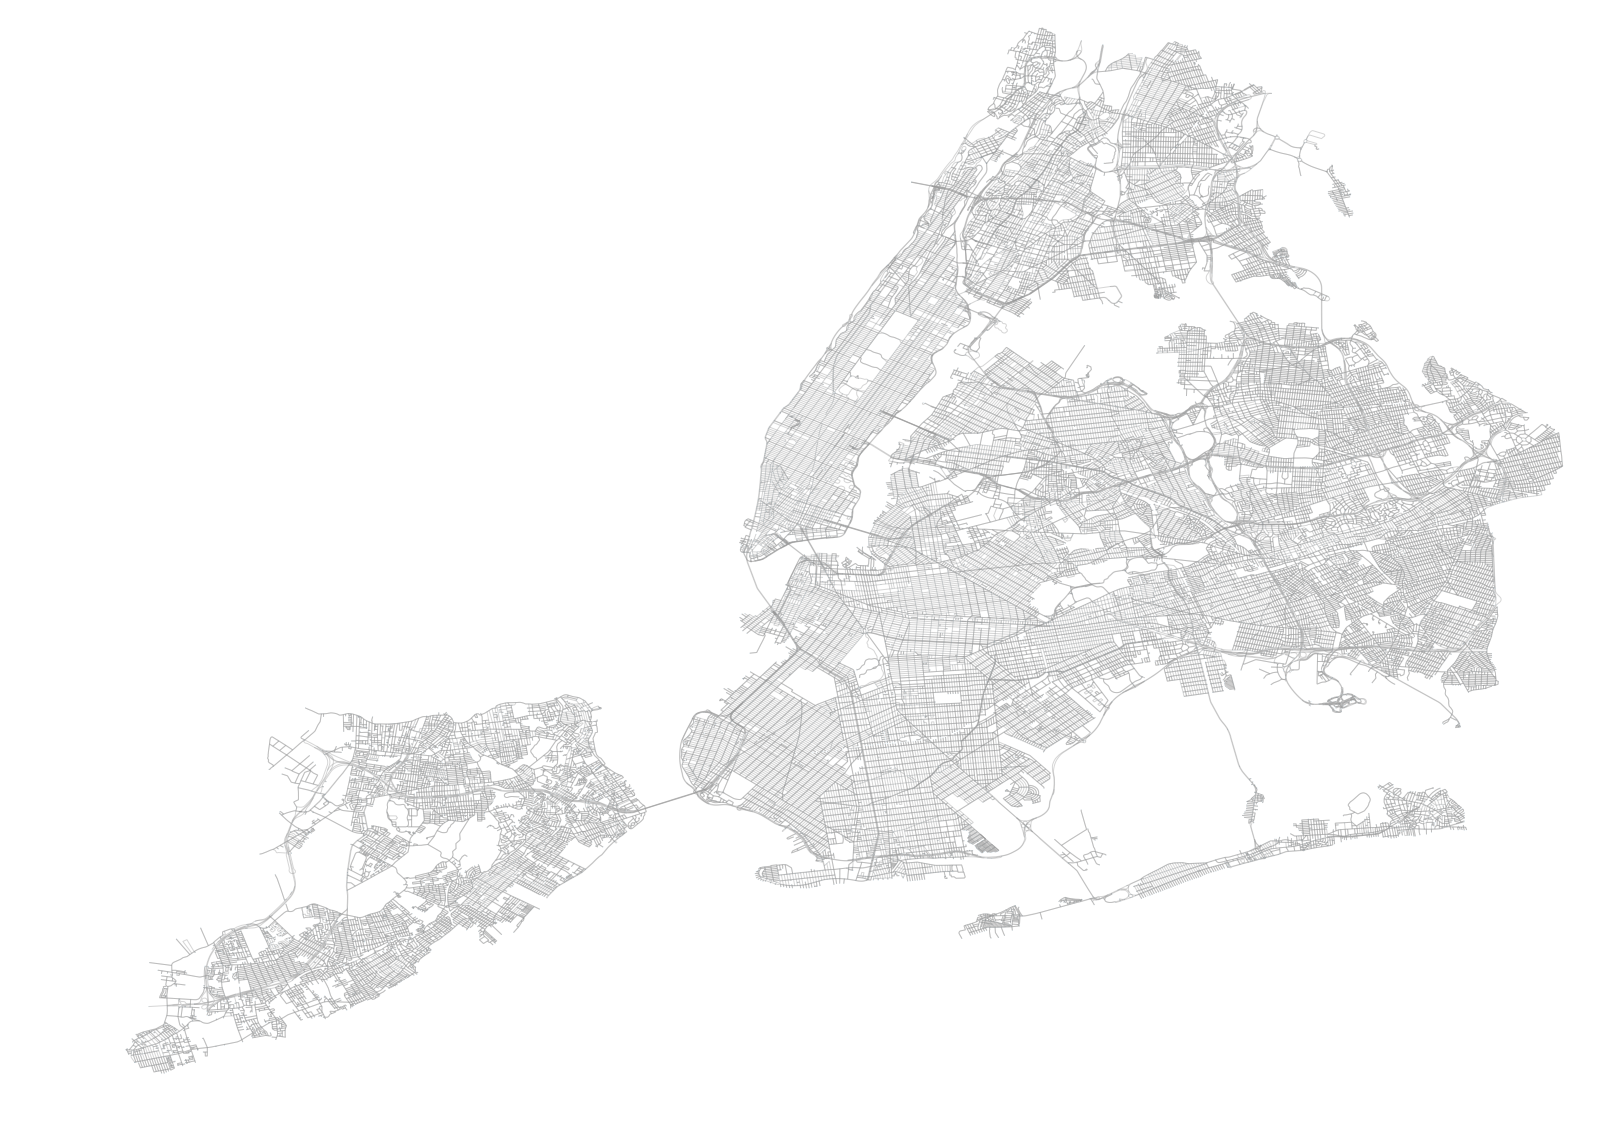

In [18]:
figroads,ax = ox.plot_graph(NYCstreets, edge_alpha=0.4, node_size=0.1, fig_height=20)

# Noise complaints 

data:
    
311 data 311_Service_Requests_from_2010_to_Present.csv from http://opendata.cityofnewyork.us/

TIGER geographic boundaries of census tracts https://www2.census.gov/geo/tiger/GENZ2014/shp/

In [68]:
df1 = pd.read_csv("/311_Service_Requests_from_2010_to_Present.csv")
df1.columns
dfNoise = df1[df1['Complaint Type'].str.contains("Noise")]
dfNoise.drop([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',
       u'Bridge Highway Segment', u'Garage Lot Name', u'Ferry Direction',
       u'Ferry Terminal Name',u'Location'], axis = 1, inplace=True)
dfNoise.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,11413.0,1052223.0,185368.0,40.675208,-73.754949
8,10468.0,1013623.0,255108.0,40.866838,-73.893802
9,11222.0,998402.0,202531.0,40.722566,-73.948944
10,11249.0,995738.0,200662.0,40.717440,-73.958558
17,11221.0,1002780.0,190153.0,40.688583,-73.933184


In [73]:
dfNoise["point"] = [shapely.geometry.Point(lon,lat) for lat,lon 
                    in zip(dfNoise.Latitude.values, dfNoise.Longitude.values)]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [63]:
# I am reading the saved noise complaints per census tract

In [64]:
counts = np.load("noisebyctb.npy")

In [25]:
NYgeodata = gpd.GeoDataFrame.from_file("cb_2014_36_tract_500k/cb_2014_36_tract_500k.shp")
NYgeodata.head()
cbs = gpd.GeoDataFrame(pd.concat([
            NYgeodata[(NYgeodata.COUNTYFP == "061")], 
            NYgeodata[(NYgeodata.COUNTYFP == "005")], 
            NYgeodata[(NYgeodata.COUNTYFP == "047")], 
            NYgeodata[(NYgeodata.COUNTYFP == "081")], 
            NYgeodata[(NYgeodata.COUNTYFP == "085")]]))
cbs["counts"] = counts

In [31]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/311_Service_Requests_from_2010_to_Present.csv")
df1.columns
dfNoise = df1[df1['Complaint Type'].str.contains("Noise")]
dfNoise.drop([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',
       u'Bridge Highway Segment', u'Garage Lot Name', u'Ferry Direction',
       u'Ferry Terminal Name',u'Location'], axis = 1, inplace=True)
dfNoise.head()

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,11413.0,1052223.0,185368.0,40.675208,-73.754949
8,10468.0,1013623.0,255108.0,40.866838,-73.893802
9,11222.0,998402.0,202531.0,40.722566,-73.948944
10,11249.0,995738.0,200662.0,40.717440,-73.958558
17,11221.0,1002780.0,190153.0,40.688583,-73.933184


Index([u'max', u'geometry', u'min', u'center'], dtype='object')

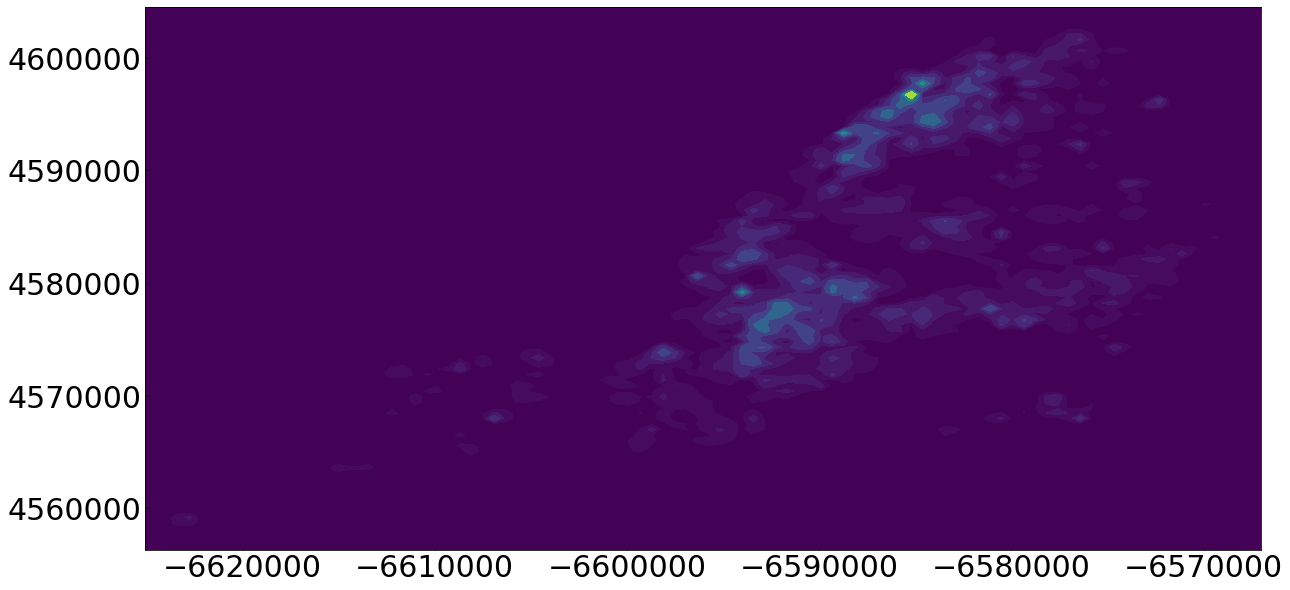

In [48]:
cbs.crs = from_epsg(4326)

StePot = smoomapy.SmoothStewart(cbs.to_crs(epsg=2263), "counts", span=200,
                           beta=2, mask=cbs.to_crs(epsg=2263),output="geojson")
res = StePot.render(nb_class=8, func_grid="matplotlib",
                        disc_func="jenks", output="GeoDataFrame")
res.columns

In [74]:
#clipping highest values for better rendering (yes, this is cheating) 
res["centerAdj"] = res["center"]
res["centerAdj"][res["center"]>60] = res["center"][res["center"]>60 - 20]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


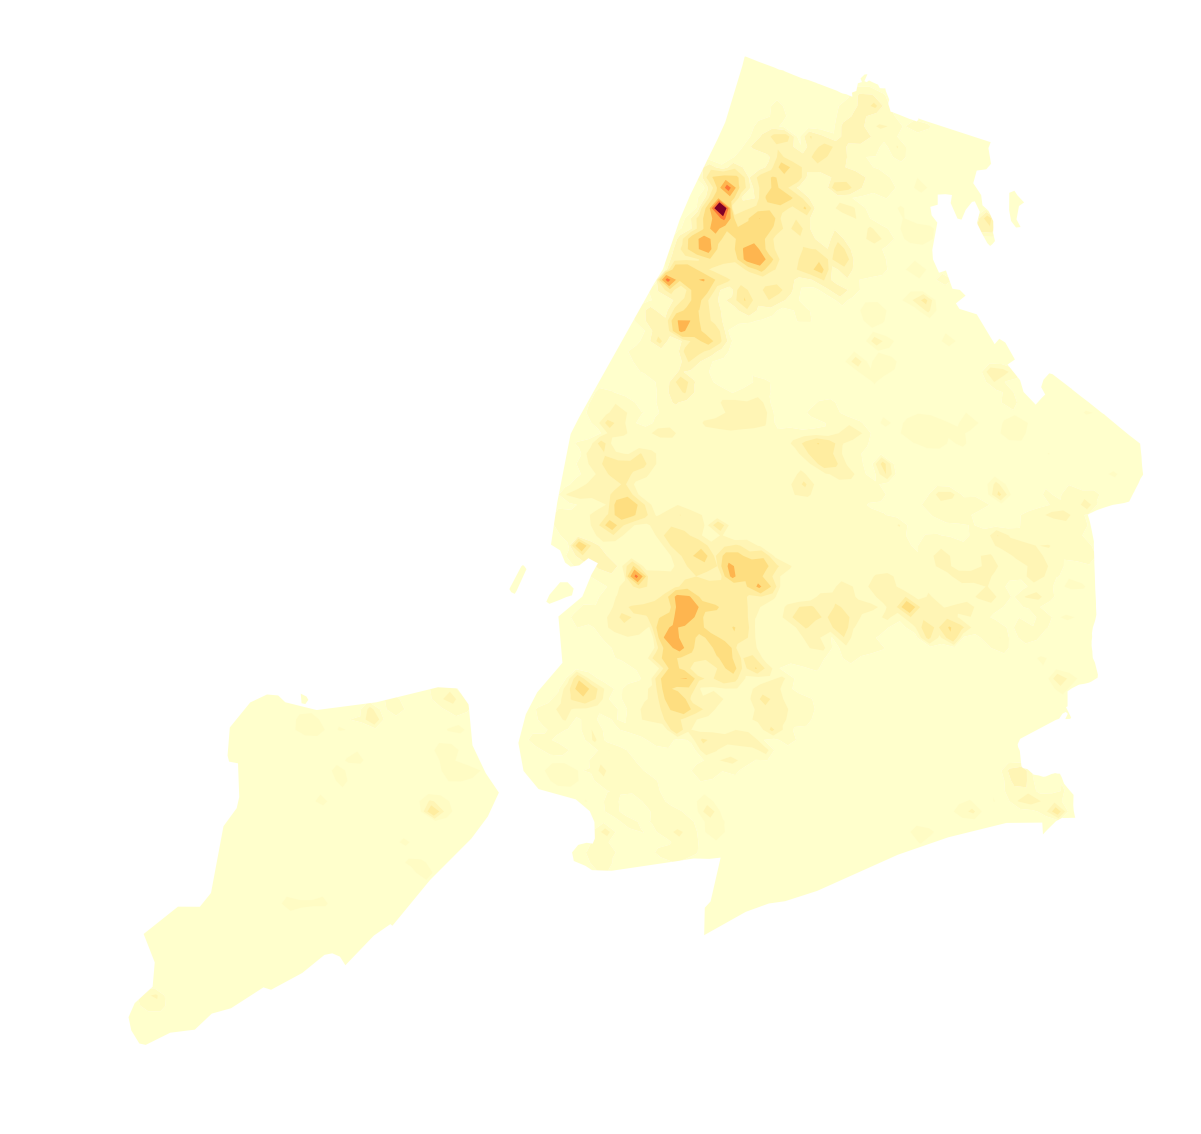

In [75]:
fig = pl.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax = cp.choroplethNYC(res.to_crs(epsg=4326), "centerAdj", kind='continuous', cmap="YlOrRd", ax=ax, lw=0, cb=False)
#NYzip.plot(ax=ax, column=None, facecolor='none')

